In [1]:
import numpy as np
import pandas as pd

In [2]:
# !python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [3]:
df = pd.read_csv("laptops.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
len(df)

2160

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
selected_cols = ["ram", "storage", "screen", "final_price"]

In [7]:
df[selected_cols].head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

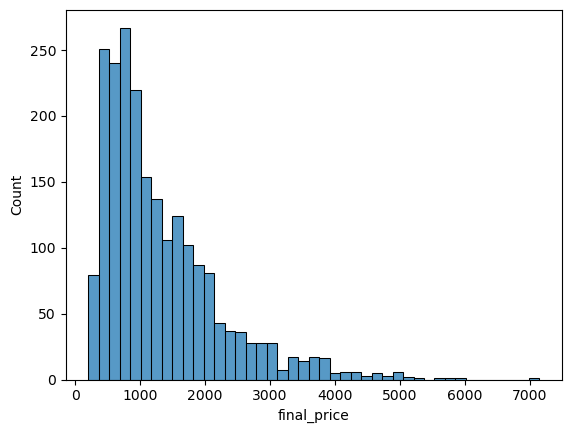

In [9]:
sns.histplot(df.final_price)

### No. 1

In [11]:
df[selected_cols].isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### No. 2

In [13]:
df.ram.median()

16.0

In [14]:
index = np.arange(len(df))

np.random.seed(42)
np.random.shuffle(index)
index

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [15]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [16]:
n, n_val+n_test+n_train

(2160, 2160)

In [17]:
train_data = df.iloc[index[:n_train]]
val_data = df.iloc[index[n_train:n_train + n_val]]
test_data = df.iloc[index[n_train + n_val:]]

In [18]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [19]:
final_price = df.final_price
final_price

0       1009.00
1        299.00
2        789.00
3       1199.00
4        669.01
         ...   
2155    2699.99
2156    2899.99
2157    3399.99
2158    1899.99
2159    1699.99
Name: final_price, Length: 2160, dtype: float64

In [20]:
y_train = train_data.final_price.values
y_val = val_data.final_price.values
y_test = test_data.final_price.values

In [21]:
del train_data["final_price"]
del val_data["final_price"]
del test_data["final_price"]

In [22]:
train_data.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No


### No. 3

In [24]:
df[selected_cols].isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [25]:
train_data["screen"].isna().sum()

3

In [26]:
val_data["screen"].isna().sum()

1

In [27]:
num_cols = ["ram", "storage", "screen"]

##### Fillna with 0

In [29]:
X_train_fillna_0 = train_data[num_cols].fillna(0).values
X_train_fillna_0

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [30]:
y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [31]:
def train_lin_reg(X, y):
    # for base bias term
    matrix = np.ones(X.shape[0])
    X = np.column_stack([matrix, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [32]:
w0, w = train_lin_reg(X_train_fillna_0, y_train)
w0, w

(676.8954853003471, array([ 43.70681555,   0.86506867, -36.10399833]))

In [33]:
y_pred_train_fillna_0 = w0 + X_train_fillna_0.dot(w)
y_pred_train_fillna_0

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

In [34]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse

RMSE:

In [36]:
rmse_y_train_fillna_0 = rmse(y_train, y_pred_train_fillna_0).round(2)
rmse_y_train_fillna_0

602.39

##### Fillna with mean

In [38]:
num_cols = ["ram", "storage", "screen"]

In [39]:
X_train_fillna_mean = train_data[num_cols].fillna(train_data[num_cols].mean()).values
X_train_fillna_mean

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [40]:
y_train

array([1123.29,  201.05,  997.74, ..., 1059.  , 1671.  , 1056.  ])

In [41]:
w0, w = train_lin_reg(X_train_fillna_mean, y_train)
w0, w

(808.9159907333383, array([ 43.90774584,   0.87135236, -45.18273312]))

In [42]:
y_pred_train_fillna_mean = w0 + X_train_fillna_mean.dot(w)
y_pred_train_fillna_mean

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

In [43]:
rmse_y_train_fillna_mean = rmse(y_train, y_pred_train_fillna_mean).round(2)
rmse_y_train_fillna_mean

602.18

In [44]:
X_val = val_data[num_cols].fillna(0).values
X_val

array([[  32. , 1000. ,   16. ],
       [  16. ,  512. ,   15.6],
       [  12. ,  512. ,   15.6],
       ...,
       [   8. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ],
       [   4. ,   64. ,   14. ]])

RMSE:

In [46]:
y_pred_val = w0 + X_val.dot(w)

rmse_y_val = rmse(y_val, y_pred_val).round(2)
rmse_y_val

597.74

### No. 4

In [48]:
def train_lin_reg_regular(X, y, r):
    # for base bias term
    matrix = np.ones(X.shape[0])
    X = np.column_stack([matrix, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [49]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_lin_reg_regular(X_train_fillna_0, y_train, r=r)
    
    y_pred_val = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred_val).round(2)
    
    print(r, w0, score)

0 676.8954853003471 597.36
0.01 676.2736817204672 597.36
0.1 670.7284836313021 597.35
1 619.9030834107807 597.21
5 463.77716971415225 597.01
10 352.79713367676436 597.06
100 66.92071440180734 597.9


### No. 5

In [51]:
rmse_values = []

for seed in [0,1,2,3,4,5,6,7,8,9]:

    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(len(df))
    np.random.seed(seed)
    # Reset idx to the original sequence before shuffling
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    final_price = df.final_price

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    # This is for deleting the final price, but I commented it because I deleted it first
    del df_train["final_price"]
    del df_val["final_price"]
    del df_test["final_price"]

    num_cols = ["ram", "storage", "screen"]
    
    X_train = df_train[num_cols].fillna(0).values
    X_val = df_val[num_cols].fillna(0).values
    X_test = df_test[num_cols].fillna(0).values

    w0, w = train_lin_reg(X_train, y_train)
    y_pred_train = w0 + X_train.dot(w)
    score_y_train = rmse(y_train, y_pred_train)

    y_pred_val = w0 + X_val.dot(w)
    score_y_val = rmse(y_val, y_pred_val)

    rmse_values.append(score_y_val)

    print(f"Seed = {seed}, RMSE_val = {score_y_val}")

Seed = 0, RMSE_val = 565.4520868770995
Seed = 1, RMSE_val = 636.7985423056726
Seed = 2, RMSE_val = 588.955869790796
Seed = 3, RMSE_val = 597.8148920012515
Seed = 4, RMSE_val = 571.962791511103
Seed = 5, RMSE_val = 573.238325661895
Seed = 6, RMSE_val = 647.3438328407194
Seed = 7, RMSE_val = 550.4398184485962
Seed = 8, RMSE_val = 587.3335036169963
Seed = 9, RMSE_val = 576.101792943313


In [52]:
rmse_array = np.array(rmse_values)    
std = np.std(rmse_array).round(3)
std

29.176

### No. 6

In [54]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [55]:
index = np.arange(len(df))

np.random.seed(9)
np.random.shuffle(index)
index

array([2003,  502,  896, ...,  501,  348,  382])

In [56]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [57]:
train_data = df.iloc[index[:n_train]]
valid_data = df.iloc[index[n_train:n_train + n_val]]
test_data = df.iloc[index[n_train + n_val:]]

In [58]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [59]:
y_train = train_data.final_price.values
y_val = valid_data.final_price.values
y_test = test_data.final_price.values

In [60]:
del train_data["final_price"]
del valid_data["final_price"]
del test_data["final_price"]

In [61]:
X_full_train = pd.concat([train_data, valid_data])
y_full_train = np.concatenate((y_train, y_val), axis=0)

X_test = test_data

In [62]:
num_cols = ["ram", "storage", "screen"]

In [63]:
X_full_train = X_full_train[num_cols].fillna(0)
X_full_train.isna().sum()

ram        0
storage    0
screen     0
dtype: int64

In [64]:
X_test = X_test[num_cols].fillna(0)
X_test.isna().sum()

ram        0
storage    0
screen     0
dtype: int64

In [65]:
w0, w = train_lin_reg_regular(X_full_train, y_full_train, r=0.001)

y_pred_test = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred_test).round(2)
rmse_test

608.61